# COMP47700 Speech and Audio
## Lab/Tutorial Sheet 2

This aim of this lab is to build on the basic audio processing in Python from lab sheet 1 and to continue to familiarise yourself with the libraries and concepts introduced in the lectures:
* Handling audio in Python
* Normalisation
* Audio processing
* Sound generation
* Visualisation - time domain (Waveform), frequency domain (Spectrum) and time-frequency domain (Spectrogram/STFT)
* Frequency Domain Visualisation with librosa and scipy/numpy
* Creating sounds in Python




## DTMF frequency grid

[Dual-tone multi-frequency signaling (DTMF)](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling) was used to send information signals over the voice frequency bands on a telephone system. While it is no longer in general use, you still hear it for some automatic information systems (e.g. telephone banking or service centres). These simple signals are interesting for introducing audio processing concepts.

The 4x4 matrix shows the frequencies to combine to create the sound for each key, e.g. to create the tone for a 4, a 770 Hz tone is combined with a 1209 Hz tone.

|        | 1209 Hz | 1336 Hz | 1477 Hz | 1633 Hz |
|--------|---------|---------|---------|---------|
| 697 Hz | 1       | 2       | 3       | A       |
| 770 Hz | 4       | 5       | 6       | B       |
| 852 Hz | 7       | 8       | 9       | C       |
| 941 Hz | *       | 0       | #       | D       |

Sine wave signals were used in the number dialling on touch-tone phones. They use a dual-tone multi-frequency DTMF system to encode the number dialled for transmission across the telephone network as an auditory signal. DTMF is also used in automated telephone service menu systems. 


Each key-press on the telephone keypad generates the sum of two tones expressed as

\begin{equation}
x(n)=cos(2\pi f_{1} nT) + cos(2\pi f_{2} nT)
\end{equation}

where $T$ is the sampling period  and the two frequencies $f_{1}$ and $f_{2}$ combine together to give a unique encoding for each digit on the keypad. The frequencies used are shown in the table above. 


In [3]:
#Imports and Magic

import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline

### Exercise 1
1. With a sampling frequency of 16 kHz, create a sin wave with a 770 Hz frequency and 0.25 amplitude.
2. Plot the 0.02 seconds of the wave and play it.

1600


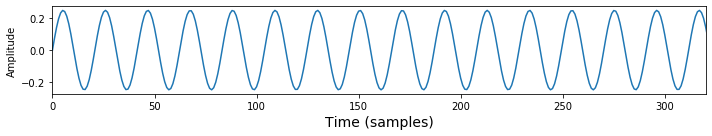

In [2]:
sr = 16000 #sampling frequency
t=np.arange(0, sr*.1) / sr #time samples

s1 = 0.25 * np.sin(2 * np.pi * 770 * t)

# Plot signal
plt.figure(figsize=(10,2))
plt.plot(s1)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)', fontsize=14)
plt.ylabel('Amplitude')
plt.tight_layout()
# Play signal
ipd.Audio(s1, rate=sr)
print(s1.size)

### Exercise 2
1. Create a second signal but this time with a frequency of 1209 Hz. 
2. Add it to your first signal and plot and play them.

**Question:** What number have you generated?

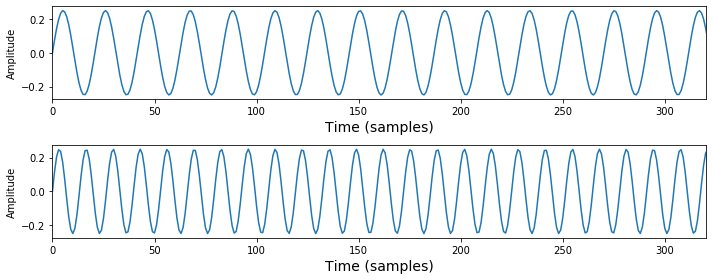

In [4]:
s2 = 0.25 * np.sin(2 * np.pi * 1209 * t)

plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(s1)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)', fontsize=14)
plt.ylabel('Amplitude')
plt.tight_layout()
plt.subplot(2,1,2)
plt.plot(s2)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)', fontsize=14)
plt.ylabel('Amplitude')
plt.tight_layout()

ipd.Audio(s2, rate=sr)

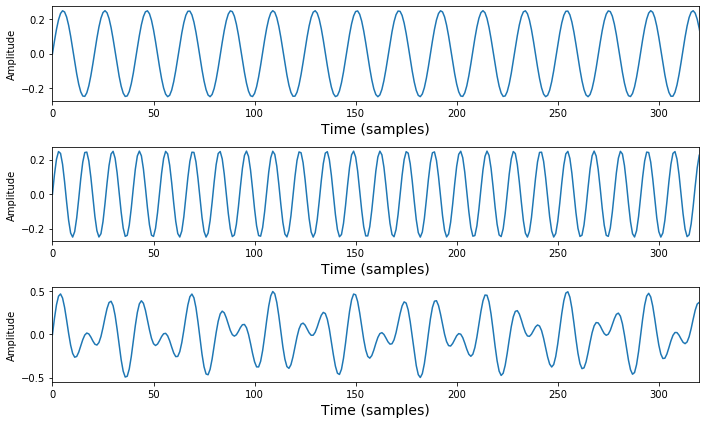

In [19]:
s_mix=s1+s2

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(s1)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)', fontsize=14)
plt.ylabel('Amplitude')
plt.tight_layout()
plt.subplot(3,1,2)
plt.plot(s2)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)', fontsize=14)
plt.ylabel('Amplitude')
plt.tight_layout()
plt.subplot(3,1,3)
plt.plot(s_mix)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)', fontsize=14)
plt.ylabel('Amplitude')
plt.tight_layout()

ipd.Audio(s1, rate=sr)

ipd.Audio(s_mix, rate=sr)

## Exercise 3

Computing a FFT to look at the signal in the frequency domain and see what tones are in the signal.

There are lots of ways of doing this, e.g.: `numpy.fft.rfft`, `scipy.fftpack.fftfreq`, `librosa.piptrack`


In [5]:
from scipy import fftpack
X = fftpack.fft(s_mix)

plt.plot(fftpack.fftfreq(len(t))*sr, np.abs(X))
plt.xlim(0, 1500);
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.tight_layout()


NameError: name 't' is not defined

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 6.]),
 array([ 759.6331 ,  806.3897 ,  853.14636,  899.90295,  946.65955,
         993.41614, 1040.1727 , 1086.9294 , 1133.686  , 1180.4426 ,
        1227.1992 ], dtype=float32),
 <a list of 10 Patch objects>)

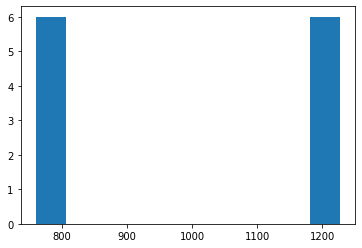

In [7]:
pitches, magnitudes = librosa.piptrack(y=s_mix, sr=sr)
freqs=pitches[pitches>0].flatten()
plt.hist(freqs)

## Mystery DTMF Number

Write code using the audio python libraries we have introduced to decode the DTMF number in this file? Explore more than one way, e.g.

1. How can you do it visually? e.g. Write code to generate a spectrgram
2. Can you do it automatically? e.g. Write code to read a file and output the numbers


In [106]:
f_dtmf='dtmfnumber.wav' 

ipd.Audio(f_dtmf) # load a local WAV file

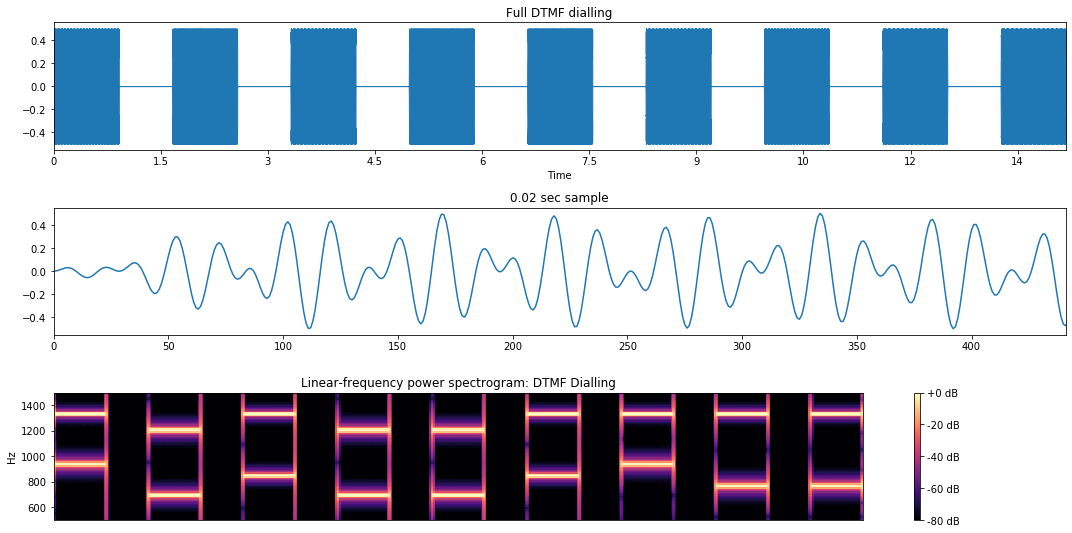

In [6]:
y_dtmf, sr = librosa.load(f_dtmf)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
librosa.display.waveplot(y_dtmf, sr=sr)
plt.title('Full DTMF dialling')

plt.subplot(4, 1, 2)
plt.plot(y_dtmf)
plt.xlim((0, 0.02*sr))
plt.title('0.02 sec sample')

plt.subplot(4, 1, 3)
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y_dtmf,n_fft=2048)),  ref=np.max)
librosa.display.specshow(D1, y_axis='linear')
plt.ylim((500,1500))
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram: DTMF Dialling')
plt.tight_layout()

## Exercise 4

Submit a notebook via brightspace demoing how to:

1. Create a function to turn a phone number into a DTMF wav file
2. Create a function to decode a DTMF number (or more generally numbers)
3. What is the phone number in the example dtmfnumber.wav?

In [86]:
'''sr = 16000 #sampling frequency
def phoneNumberToDTMF(ph_string):
    audio = []
    d = {'1':(697,1209),'2':(697,1336),'3':(697,1477),'4':(770,1209),'5':(770,1336),'6':(770,1477),
     '7':(852,1209),'8':(852,1336),'9':(852,1477),'*':(941,1209),'0':(941,1336),'#':(941,1477),
     'A':(697,1633),'B':(770,1633),'C':(852,1633),'D':(941,1633)}
    
    t=np.arange(0, sr*.5) / sr #time samples
    for curr in ph_string:
        freq = d[curr]
        low_freq = int(freq[0])
        high_freq = int(freq[1])
        s1 = 0.25 * np.sin(2 * np.pi * low_freq * t)
        s2 = 0.25 * np.sin(2 * np.pi * high_freq * t)
        s_mix=s1+s2
        #librosa.output.write_wav('file_'+curr+'.wav', s_mix, sr)
        audio.append(s_mix)
    return audio
    
s_mix = phoneNumberToDTMF(('9','8','9','2','0'))
ipd.Audio(s_mix, rate=sr)'''




"sr = 16000 #sampling frequency\ndef phoneNumberToDTMF(ph_string):\n    audio = []\n    d = {'1':(697,1209),'2':(697,1336),'3':(697,1477),'4':(770,1209),'5':(770,1336),'6':(770,1477),\n     '7':(852,1209),'8':(852,1336),'9':(852,1477),'*':(941,1209),'0':(941,1336),'#':(941,1477),\n     'A':(697,1633),'B':(770,1633),'C':(852,1633),'D':(941,1633)}\n    \n    t=np.arange(0, sr*.5) / sr #time samples\n    for curr in ph_string:\n        freq = d[curr]\n        low_freq = int(freq[0])\n        high_freq = int(freq[1])\n        s1 = 0.25 * np.sin(2 * np.pi * low_freq * t)\n        s2 = 0.25 * np.sin(2 * np.pi * high_freq * t)\n        s_mix=s1+s2\n        #librosa.output.write_wav('file_'+curr+'.wav', s_mix, sr)\n        audio.append(s_mix)\n    return audio\n    \ns_mix = phoneNumberToDTMF(('9','8','9','2','0'))\nipd.Audio(s_mix, rate=sr)"

Excercise 1

In [114]:
import pyaudio
import wave, numpy

CHANNELS = 1
RATE = 16000
CHUNK = 1024
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "dtmf.wav"
silence = np.zeros(int(0.1*16000))
stream = p.open(format=pyaudio.paFloat32,
                    channels=1, rate=sr, output=1)
p = pyaudio.PyAudio()

def phoneNumberToDTMF(ph_string):
    audio = []
    d = {'1':(697,1209),'2':(697,1336),'3':(697,1477),'4':(770,1209),'5':(770,1336),'6':(770,1477),
     '7':(852,1209),'8':(852,1336),'9':(852,1477),'*':(941,1209),'0':(941,1336),'#':(941,1477),
     'A':(697,1633),'B':(770,1633),'C':(852,1633),'D':(941,1633)}
    
    t=np.arange(0, sr*.5) / sr #time samples
    for curr in ph_string:
        freq = d[curr]
        low_freq = int(freq[0])
        high_freq = int(freq[1])
        s1 = 0.25 * np.sin(2 * np.pi * low_freq * t)
        s2 = 0.25 * np.sin(2 * np.pi * high_freq * t)
        s_mix=s1+s2
        #librosa.output.write_wav('file_'+curr+'.wav', s_mix, sr)
        audio.append(s_mix)
        #audio.append(silence)
        #stream.write(s_mix.astype(numpy.float32).tostring())
        time.sleep(0.2)
    X = np.array(audio, dtype='float32') # creates an one long array of tone samples to record
    stream.write(X.astype(np.float32).tostring()) # to hear tones
    
    for i in range(0, int(RECORD_SECONDS)):
        waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
        waveFile.setnchannels(CHANNELS)
        waveFile.setsampwidth(p.get_sample_size(FORMAT))
        waveFile.setframerate(RATE)
        waveFile.writeframes(X.astype(np.float32).tostring())
        waveFile.close()
number = ('9','8','9','2','0','1','1','0','2','5')
phoneNumberToDTMF(number)
print('Done')

Done


Ex 2

919.0000000000001 1304.0


ValueError: x and y must have same first dimension, but have shapes (22050,) and (21504,)

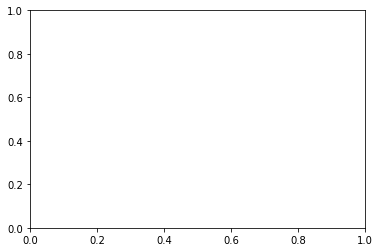

In [19]:
import librosa
y, sr = librosa.load('dtmfnumber.wav')
t=np.arange(0, sr) / sr

output = librosa.effects.split(y)
#print(output)
def freq_apxmator(low, high):
    if low < 700:
        if high < 1220:
            return 1
        elif high < 1340:
            return 2
        elif high < 1500:
            return 3
        else:
            return 'A'
    elif low < 800:
        if high < 1220:
            return 4
        elif high < 1340:
            return 5
        elif high < 1500:
            return 6
        else:
            return 'B'
    elif low < 900:
        if high < 1220:
            return 7
        elif high < 1340:
            return 8
        elif high < 1500:
            return 9
        else:
            return 'C'
    else:
        if high < 1220:
            return '*'
        elif high < 1340:
            return 0
        elif high < 1500:
            return '#'
        else:
            return 'D'

def DTMF_Decode(s_mix, sr):
    t=np.arange(0, sr*1) / sr 
    X = fftpack.fft(s_mix)
    Y = fftpack.fftfreq(len(t))*sr
    low=0
    high = 0
    prev = 0
    for i in range(0,len(X)):
        x = np.abs(X[i])
        if x > 1500 and x > prev:
            prev = x
        if x < prev:
            
            low = Y[i]
            break
    #print('---------')
    prev = 0
    for j in range(i,len(X)):
        x = np.abs(X[j])
        if x > 1500 and x > prev:
            prev = x
        elif x < prev:
            high = Y[j]
            break
    print(low,high)
    plt.plot(fftpack.fftfreq(len(t))*sr, np.abs(X))
    plt.xlim(500, 1500);
    plt.grid()
    plt.xlabel('Frequency (Hz)')
    plt.tight_layout()
    print(freq_apxmator(low,high))
s_mix = y[0:sr*1]

# need to vary time range of the wav file here, needs work
lower = int(sr*4)
upper = int(sr*5)


output = librosa.effects.split(y)
for curr_chunk in output:
    DTMF_Decode(y[curr_chunk[0]:curr_chunk[1]],sr)
    
#X = fftpack.fft(y[lower:upper])
plt.plot(fftpack.fftfreq(len(t))*sr, np.abs(X))
plt.xlim(500, 1500);
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
#print(np.abs(X))
#pitches, magnitudes = librosa.piptrack(y=y[0:sr], sr=sr)
#freqs=pitches[pitches>0].flatten()
#plt.hist(freqs)
#ipd.Audio(y[sr:sr*2], rate=sr)


Mystery Number in the DTMF File is 018118055